In [1]:
import pandas as pd
import numpy as np
df_to_save=pd.read_csv('./data/fullfiber_clusters_new.csv')
df_to_save

,protein_files,wrong_code,spectral_clusters,spectral_clusters_umap,umap_proj_1,umap_proj_2,filtered_clusters,filtered_clusters_umap,clusters_mmseq2_singletron_groupped,right_code,family,subfamily,phage,nick,label_order
0,ACB97589_merged_all.pdb_relax.pdb,ACB97589,14,9,14.562919,5.693491,14,9,2,AWD91690,Straboviridae,Tevenvirinae,Enterobacteria phage vB_EcoM_IME340,RBP_00,56
1,ACD75703_merged_all.pdb_relax.pdb,ACD75703,4,3,9.823701,9.362837,4,3,8,QXV80698,Drexlerviridae,Tempevirinae,Escherichia phage JakobBernoulli,RBP_01,23
2,AEK12502_merged_all.pdb_relax.pdb,AEK12502,4,3,9.691687,8.861309,4,3,8,YP_003912,Drexlerviridae,Tunavirinae,Escherichia phage T1,RBP_02,25
3,AEM00908_merged_all.pdb_relax.pdb,AEM00908,6,7,13.459285,8.898555,6,7,1,AFU62385,NaN,Ounavirinae,Escherichia phage EC6,RBP_03,10
4,AEV89340_merged_all.pdb_relax.pdb,AEV89340,1,4,15.571766,8.881592,1,4,19,QXV80938,NaN,Vequintavirinae,Escherichia phage JeffSchatz,RBP_04,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,YP_009145700_merged_all.pdb_relax.pdb,YP_009145700,11,5,14.757312,8.202130,11,-1,23,AEM00908,Straboviridae,Tevenvirinae,\tEscherichia phage wV7,RBP_61,58
59,YP_009323872_merged_all.pdb_relax.pdb,YP_009323872,3,15,10.051177,8.634238,3,15,3,QBQ80471,NaN,Dhillonvirus (genus),Escherichia phage vB_EcoS_PTXU06,RBP_62,18
60,YP_009600425_merged_all.pdb_relax.pdb,YP_009600425,6,7,13.403298,8.923509,6,7,1,YP_009600425,NaN,Ounavirinae,Salmonella phage Mushroom,RBP_63,9
61,YP_009824934_merged_all.pdb_relax.pdb,YP_009824934,9,6,11.164365,7.947743,9,6,15,QXV82771,NaN,Vequintavirinae,Escherichia phage MaxTheCat,RBP_64,14


In [4]:
# Read the CSV file into a DataFrame
mat = pd.read_csv("./data/US_results.csv", sep="\t")

# Create a list of unique PDB codes
pdb_codes = np.unique(np.concatenate([mat['PDBchain1'], mat['PDBchain2']]))

# Initialize a matrix with dimensions (number of PDB codes) x (number of PDB codes)
mat_transformed = pd.DataFrame(0.0, index=pdb_codes, columns=pdb_codes)  # Use 0.0 to indicate a float

# Fill in the values from the original matrix
for i in range(len(mat)):
    mat_transformed.loc[mat['PDBchain1'][i], mat['PDBchain2'][i]] = np.mean((mat['TM1'][i], mat['TM2'][i]))#min(mat['TM1'][i], mat['TM2'][i])
    mat_transformed.loc[mat['PDBchain2'][i], mat['PDBchain1'][i]] = np.mean((mat['TM1'][i], mat['TM2'][i]))#min(mat['TM1'][i], mat['TM2'][i])#

# Set diagonal elements to 1
np.fill_diagonal(mat_transformed.values, 1)

# Convert the DataFrame to a data frame (Note: This line is redundant and can be removed)
#mat_transformed = pd.DataFrame(mat_transformed)
#mat_transformed[mat_transformed < 0.4] = 0
#mat_transformed[mat_transformed >= 0.9 ] = 1


rows_to_drop = ['QXV76923_merged_all.pdb_relax.pdb:A', 'QBO61254_merged_all.pdb_relax.pdb:A', 'QXV78163_merged_all.pdb_relax.pdb:A']
mat_transformed.drop(index=rows_to_drop, columns=rows_to_drop, inplace=True)

mat_transformed

,ACB97589_merged_all.pdb_relax.pdb:A,ACD75703_merged_all.pdb_relax.pdb:A,AEK12502_merged_all.pdb_relax.pdb:A,AEM00908_merged_all.pdb_relax.pdb:A,AEV89340_merged_all.pdb_relax.pdb:A,AEZ65169_merged_all.pdb_relax.pdb:A,AFH20211_merged_all.pdb_relax.pdb:A,AFU62385_merged_all.pdb_relax.pdb:A,AGR46195_merged_all.pdb_relax.pdb:A,AKA61060_merged_all.pdb_relax.pdb:A,...,YP_003912_merged_all.pdb_relax.pdb:A,YP_004414866_merged_all.pdb_relax.pdb:A,YP_007112629_merged_all.pdb_relax.pdb:A,YP_008530272_merged_all.pdb_relax.pdb:A,YP_008530274_merged_all.pdb_relax.pdb:A,YP_009145700_merged_all.pdb_relax.pdb:A,YP_009323872_merged_all.pdb_relax.pdb:A,YP_009600425_merged_all.pdb_relax.pdb:A,YP_009824934_merged_all.pdb_relax.pdb:A,YP_009901592_merged_all.pdb_relax.pdb:A
ACB97589_merged_all.pdb_relax.pdb:A,1.00000,0.17380,0.13460,0.29500,0.27045,0.57920,0.26860,0.24050,0.36810,0.13935,...,0.36355,0.39450,0.19090,0.16990,0.35270,0.30815,0.14535,0.29435,0.23570,0.36190
ACD75703_merged_all.pdb_relax.pdb:A,0.17380,1.00000,0.44330,0.16080,0.21345,0.17620,0.21325,0.25395,0.17520,0.37075,...,0.17145,0.18490,0.13420,0.24490,0.17630,0.20150,0.35370,0.17660,0.25705,0.17230
AEK12502_merged_all.pdb_relax.pdb:A,0.13460,0.44330,1.00000,0.11360,0.18260,0.13270,0.19500,0.29435,0.12275,0.36515,...,0.13055,0.13900,0.11985,0.23825,0.09795,0.24100,0.37495,0.12280,0.29145,0.12775
AEM00908_merged_all.pdb_relax.pdb:A,0.29500,0.16080,0.11360,1.00000,0.30425,0.28835,0.29530,0.21715,0.29930,0.17925,...,0.31205,0.27050,0.18420,0.16465,0.34145,0.22030,0.15380,0.65085,0.21455,0.31200
AEV89340_merged_all.pdb_relax.pdb:A,0.27045,0.21345,0.18260,0.30425,1.00000,0.31260,0.86620,0.18470,0.32435,0.18670,...,0.33010,0.28685,0.21555,0.21675,0.27420,0.43035,0.19980,0.29205,0.21365,0.31600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YP_009145700_merged_all.pdb_relax.pdb:A,0.30815,0.20150,0.24100,0.22030,0.43035,0.31700,0.41845,0.19005,0.30255,0.24545,...,0.32440,0.27495,0.21270,0.24830,0.33550,1.00000,0.22770,0.22615,0.19725,0.31280
YP_009323872_merged_all.pdb_relax.pdb:A,0.14535,0.35370,0.37495,0.15380,0.19980,0.15065,0.18205,0.19120,0.12485,0.75270,...,0.13100,0.13355,0.09700,0.26915,0.11795,0.22770,1.00000,0.15180,0.16115,0.11605
YP_009600425_merged_all.pdb_relax.pdb:A,0.29435,0.17660,0.12280,0.65085,0.29205,0.29030,0.28235,0.22800,0.30680,0.15600,...,0.31940,0.26095,0.21125,0.15605,0.32450,0.22615,0.15180,1.00000,0.22070,0.32405
YP_009824934_merged_all.pdb_relax.pdb:A,0.23570,0.25705,0.29145,0.21455,0.21365,0.23535,0.21090,0.54350,0.24005,0.17020,...,0.24995,0.21875,0.20740,0.17565,0.24320,0.19725,0.16115,0.22070,1.00000,0.24010


In [6]:
clusters = df_to_save['spectral_clusters']
identity_matrix= mat_transformed
row_names = mat_transformed.index

row_names =row_names .str.replace(':A','')
row_names =row_names .str.replace(':B','')
row_names =row_names .str.replace(':C','')

import matplotlib.pyplot as plt 
def calculate_cluster_means(identity_matrix, clusters, row_names):

    cluster_means = {}
    unique_clusters = set(clusters)
    
    mean_no_d = []
    for cluster_label in unique_clusters:
        # Get indices of members belonging to the current cluster
        cluster_indices = [i for i, label in enumerate(clusters) if label == cluster_label]
        
        # Filter rows and columns corresponding to the current cluster
        cluster_matrix = identity_matrix.iloc[cluster_indices, cluster_indices]
        #print(np.std(cluster_matrix))
        # Calculate the mean value of the filtered values
        
        m_value =(cluster_matrix.sum(1)-np.diag(cluster_matrix))/(cluster_matrix.shape[1]-1)
        mean_no_d.append(list(m_value))
        mean_value = np.mean(m_value) # Calculate mean of all values
        std_value = np.std(m_value)/np.sqrt(len(m_value)-1)
        
        # Store mean value along with cluster label
        cluster_means[cluster_label] = {
            'mean_value': np.round(mean_value,2),
            'std_value': np.round(std_value,2),
            'cluster_size': len(cluster_indices)
        }
        
    return cluster_means,mean_no_d

# Calculate cluster means
cluster_means, mean_no_d = calculate_cluster_means(identity_matrix, clusters, row_names)

# Print cluster means
for cluster_label, values in cluster_means.items():
    print(f"Cluster {cluster_label}: Mean value = {values['mean_value']}, Cluster size = {values['cluster_size']}, std size = {values['std_value']}", round(values['mean_value']-values['std_value'],2) )

mean_values = [values['mean_value'] for values in cluster_means.values()]

# Calculate the overall mean of the cluster means
overall_mean = np.mean(mean_values)

mean_no_d = pd.DataFrame(mean_no_d).transpose()

Cluster 0: Mean value = 0.65, Cluster size = 4, std size = 0.03 0.62
Cluster 1: Mean value = 0.85, Cluster size = 5, std size = 0.03 0.82
Cluster 2: Mean value = 0.82, Cluster size = 3, std size = 0.04 0.78
Cluster 3: Mean value = 0.58, Cluster size = 3, std size = 0.04 0.54
Cluster 4: Mean value = 0.39, Cluster size = 5, std size = 0.02 0.37
Cluster 5: Mean value = 0.27, Cluster size = 2, std size = 0.0 0.27
Cluster 6: Mean value = 0.65, Cluster size = 4, std size = 0.01 0.64
Cluster 7: Mean value = 0.4, Cluster size = 3, std size = 0.02 0.38
Cluster 8: Mean value = 0.76, Cluster size = 4, std size = 0.02 0.74
Cluster 9: Mean value = 0.55, Cluster size = 4, std size = 0.01 0.54
Cluster 10: Mean value = 0.35, Cluster size = 3, std size = 0.01 0.34
Cluster 11: Mean value = 0.88, Cluster size = 2, std size = 0.0 0.88
Cluster 12: Mean value = 0.5, Cluster size = 4, std size = 0.03 0.47
Cluster 13: Mean value = 0.93, Cluster size = 2, std size = 0.0 0.93
Cluster 14: Mean value = 0.52, Clus

Overall mean TM-score for random class: 0.25
Selected representatives (indices): [19, 18, 56, 30, 17, 22, 51, 32, 8, 61, 55, 12, 11, 24, 36, 31, 47, 43]


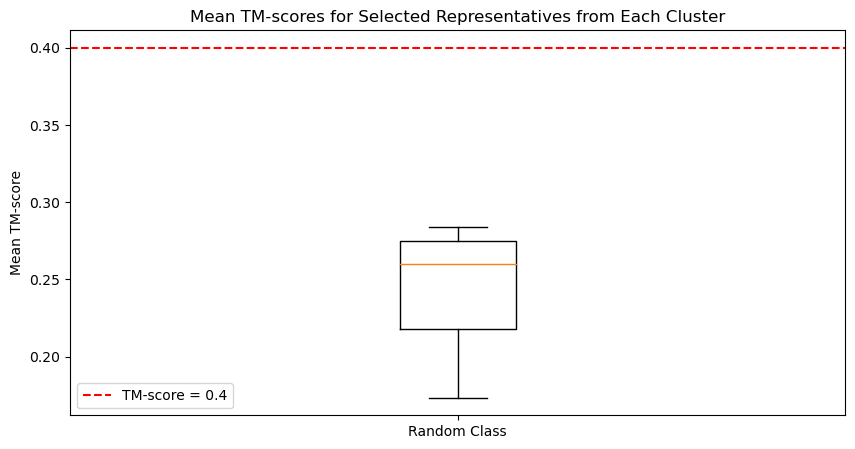

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select one representative from each cluster and calculate the mean TM-score
def calculate_random_class_mean(identity_matrix, clusters, row_names):
    unique_clusters = set(clusters)
    
    selected_representatives = []
    
    # Randomly select one representative from each cluster
    for cluster_label in unique_clusters:
        # Get indices of members belonging to the current cluster
        cluster_indices = [i for i, label in enumerate(clusters) if label == cluster_label]
        
        # Randomly select one representative from the cluster
        selected_representative = np.random.choice(cluster_indices)
        selected_representatives.append(selected_representative)

    # Filter the identity_matrix to only include the selected representatives
    representative_matrix = identity_matrix.iloc[selected_representatives, selected_representatives]

    # Calculate the mean TM-score for each representative (excluding self-alignments)
    mean_values = (representative_matrix.sum(1) - np.diag(representative_matrix)) / (representative_matrix.shape[1] - 1)
    
    # Calculate the overall mean TM-score for the random class
    overall_mean_random_class = np.mean(mean_values)
    
    return overall_mean_random_class, mean_values, selected_representatives

# Calculate the random class mean TM-score
overall_mean_random_class, mean_values, selected_representatives = calculate_random_class_mean(identity_matrix, clusters, row_names)

# Print the results
print(f"Overall mean TM-score for random class: {overall_mean_random_class:.2f}")
print("Selected representatives (indices):", selected_representatives)

# Optional: Plot the distribution of mean TM-scores for selected representatives
plt.figure(figsize=(10, 5))
plt.boxplot(mean_values)
plt.title('Mean TM-scores for Selected Representatives from Each Cluster')
plt.ylabel('Mean TM-score')
plt.xticks([1], ['Random Class'])
plt.axhline(y=0.4, color='r', linestyle='--', label='TM-score = 0.4')
plt.legend()
plt.show()


In [8]:
import numpy as np
import pandas as pd

# Assuming mean_no_d has fewer rows (4 rows in this case)
df_TM = pd.DataFrame(mean_no_d)

# Padding df_TM to match the length of mean_values (17 values)
# Fill with NaN values to extend it to 17 rows
df_TM = df_TM.reindex(range(len(mean_values)))

# Add the mean_values as a new column in the DataFrame
df_TM['r'] = np.array(mean_values)


/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

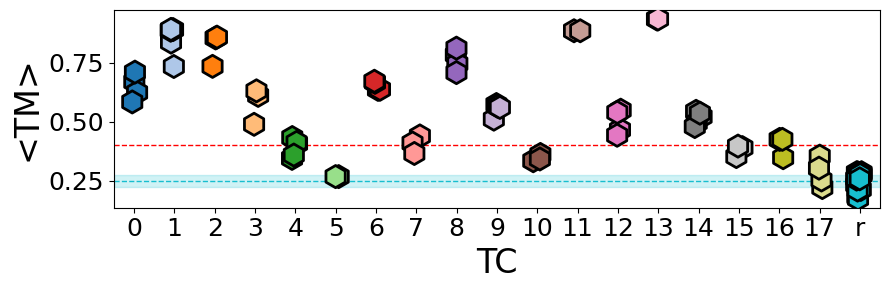

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pypalettes import load_cmap

# Load predefined colormaps
std_random_class = np.std(df_TM['r'])/np.sqrt(len(df_TM['r']))
palette_tc = sns.color_palette("tab20")[0:19]
plt.figure(figsize=(9, 3))

# Create the strip plot
sns.stripplot(data=df_TM, jitter=True, edgecolor='black', lw=20, palette=palette_tc, linewidth=2, marker='h', size=16)

# Add axis labels
plt.xlabel('TC', fontsize=24)
plt.ylabel('<TM>', fontsize=24)

# Add a horizontal line at y = 0.4
plt.axhline(y=0.4, color='red', linestyle='--', linewidth=1)

# Add horizontal lines for the overall mean and shading for the interval
plt.axhline(y=overall_mean_random_class, color=palette_tc[18], linestyle='--', linewidth=1)

# Fill the region between mean ± 2*std
plt.fill_between(x=[-0.5, len(df_TM)+0.5], 
                 y1=overall_mean_random_class - 3*std_random_class, 
                 y2=overall_mean_random_class + 3*std_random_class, 
                 color=palette_tc[18], alpha=0.2, label='Mean ± 2 Std')

# Set x-limits to extend the shading fully across the x-axis
plt.xlim([-0.5, len(df_TM)+0.5])

# Customize ticks and layout
plt.tick_params(axis='y', which='major', labelsize=18)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tight_layout()

# Show the plot
plt.show()
